# Imports

In [139]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from prettytable import PrettyTable

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
from utils import (
    save_object,
    load_object,
    save_model,
    load_model
)

from torch_stuff import (
    MeansDataset,
    LSTMForecaster,
    train,
    finetune,
    compare_sufficient,
    compare_different_sufficient
)

# Regression

In [141]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Let's download precomputed data, which consists of 

- `samples_sizes`
- `means`
- `variances`

for each dataset in 13 regression datasets from UCI

In [86]:
datasets_regression = load_object('dumps/datasets_regression_50.pkl')

Train the LSTM model to predict these functions like timeseries

In [91]:
n_epochs=1000
lookback=10
hidden_size=64
batch_size=4

means_model = train(n_epochs=n_epochs,
                    lookback=lookback,
                    hidden_size=hidden_size,
                    batch_size=batch_size,
                    datasets=datasets_regression)

100%|██████████| 1000/1000 [02:22<00:00,  7.03it/s]


Save the model

In [92]:
save_model(means_model, './checkpoints', 'lstm.pth')

[INFO] Saving model to: checkpoints/lstm.pth


We choose particular dataset by `idx`. Then we finetune our LSTM model on the train part of these dataset. After that we predict mean of the loss function on test part.

[INFO] Loading model from: checkpoints/lstm.pth


100%|██████████| 5/5 [00:00<00:00, 536.27it/s]


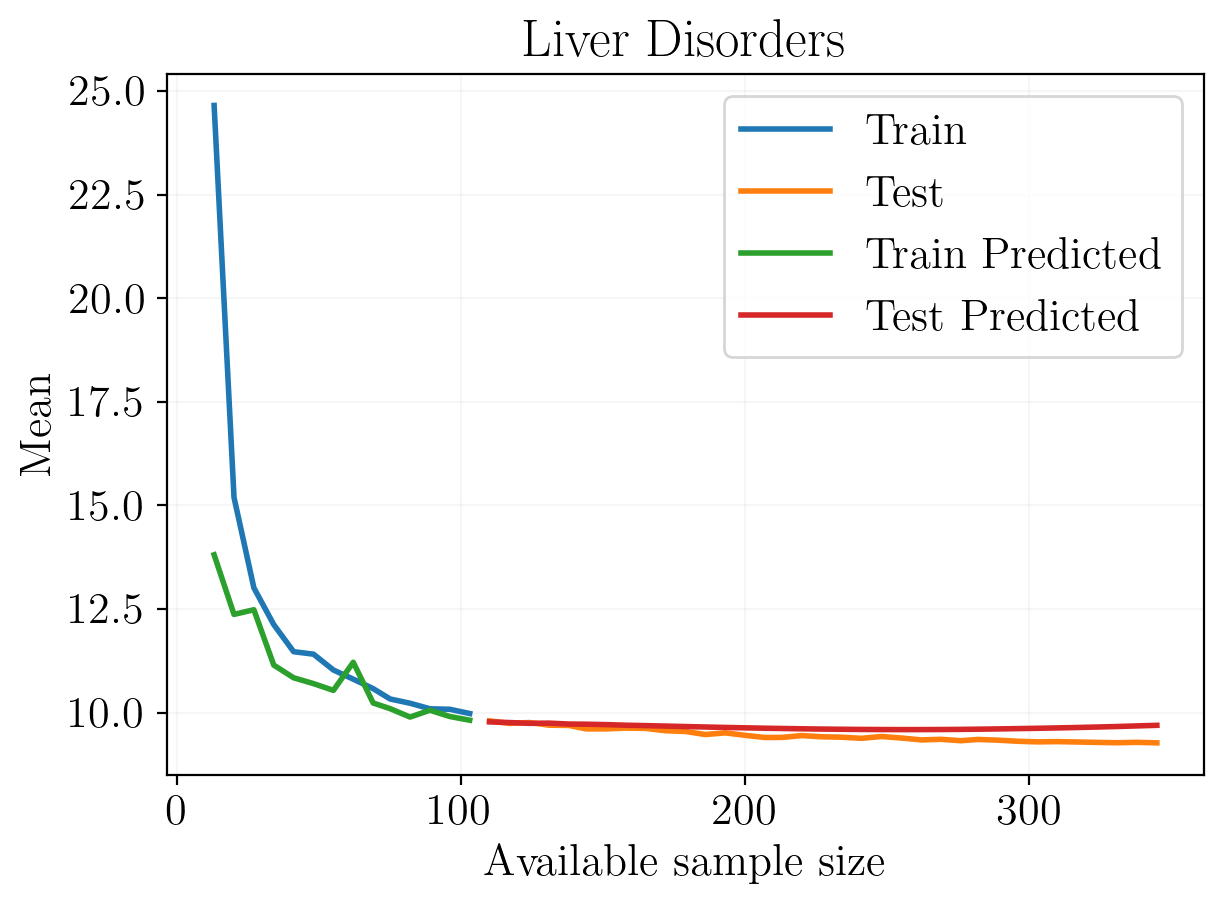

In [149]:
samples, means, means_predicted = finetune(model=means_model,
                                            idx=3,
                                            n_epochs=5,
                                            train_size=0.3,
                                            lookback=lookback,
                                            datasets=datasets_regression,
                                            save=True,
                                            filename='approximation-liver-disorders.pdf')

Using these plot, we can compare M-sufficient sample size for actual and predicted functions

[INFO] Loading model from: checkpoints/lstm.pth


100%|██████████| 5/5 [00:00<00:00, 562.62it/s]


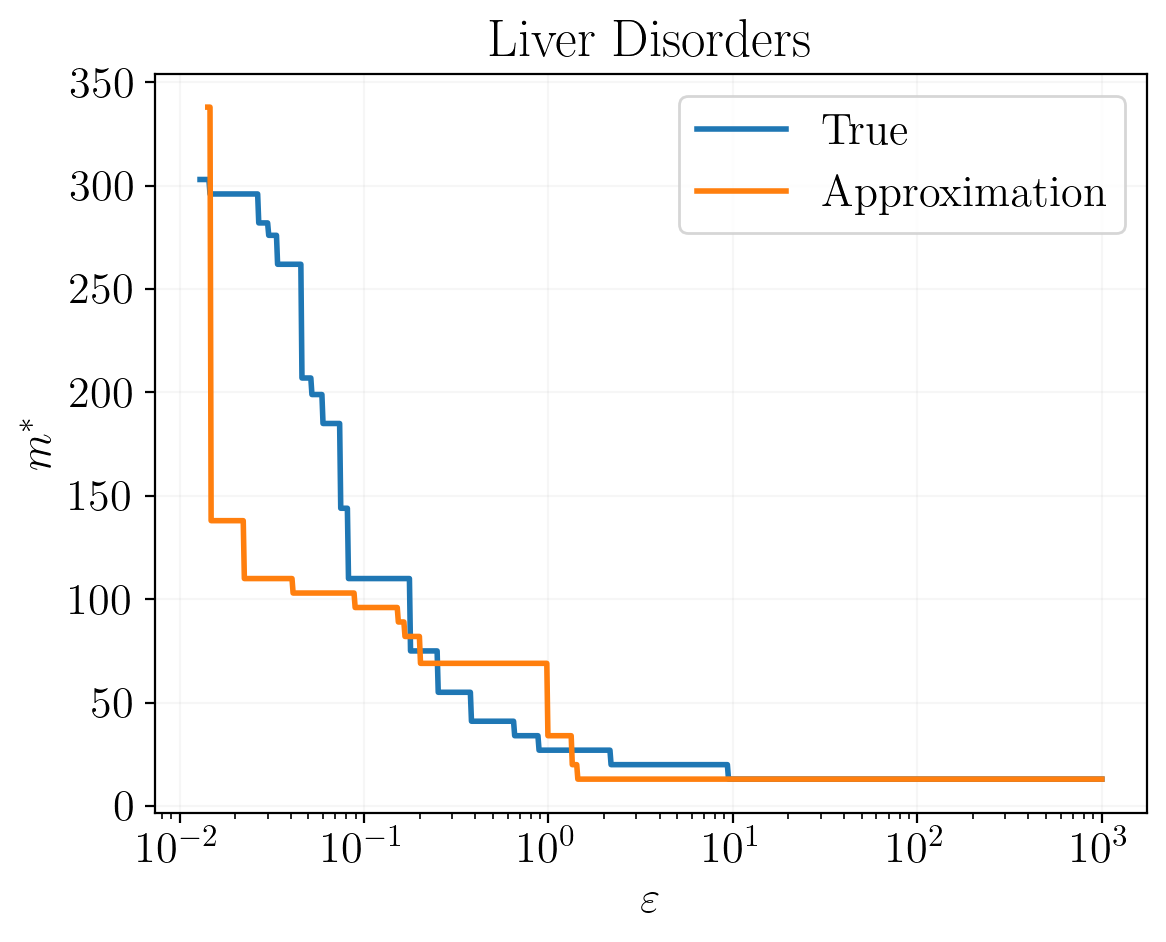

In [150]:
sufficient, sufficient_approx = compare_sufficient(model=means_model,
                                                    thresholds=np.logspace(-3, 3, 1000),
                                                    idx=3,
                                                    n_epochs=5,
                                                    train_size=0.3,
                                                    lookback=lookback,
                                                    datasets=datasets_regression,
                                                    plot=True,
                                                    save=True,
                                                    filename='comparison-liver-disorders.pdf')

## Different datasets

We will compare actual sufficient sample size vs predicted one for the fixed hyperparameter $\varepsilon$ for all the regression datasets 

In [138]:
compare_different_sufficient(model=means_model,
                            thresholds=np.logspace(-3, 3, 7),
                            n_epochs=5,
                            train_size=0.3,
                            lookback=lookback,
                            datasets=datasets_regression)

13it [00:00, 127.79it/s]


+-------------------------------------------------------+
|                      eps = 0.001                      |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |  inf   |    1625   |
|             Auto MPG             |  inf   |    inf    |
|            Automobile            |  inf   |    inf    |
|         Liver Disorders          |  inf   |    inf    |
|              Servo               |  inf   |    inf    |
|           Forest Fires           |  inf   |    inf    |
|           Wine Quality           |  1071  |    1203   |
|        Energy Efficiency         |  inf   |    inf    |
|       Student Performance        |  inf   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |  inf   |    inf    |
|  Heart Failure Clinical Records  |  223   |    118    |
| Bone marrow 

13it [00:00, 132.50it/s]


+-------------------------------------------------------+
|                       eps = 0.01                      |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |  2816  |    1114   |
|             Auto MPG             |  inf   |    inf    |
|            Automobile            |  inf   |    inf    |
|         Liver Disorders          |  inf   |    inf    |
|              Servo               |  147   |    inf    |
|           Forest Fires           |  inf   |    inf    |
|           Wine Quality           |  277   |    145    |
|        Energy Efficiency         |  inf   |    242    |
|       Student Performance        |  inf   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |  inf   |    inf    |
|  Heart Failure Clinical Records  |   59   |     71    |
| Bone marrow 

13it [00:00, 133.00it/s]


+-------------------------------------------------------+
|                       eps = 0.1                       |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |  264   |     94    |
|             Auto MPG             |  141   |    110    |
|            Automobile            |  118   |    inf    |
|         Liver Disorders          |  110   |     96    |
|              Servo               |   38   |     47    |
|           Forest Fires           |  inf   |    inf    |
|           Wine Quality           |  145   |    145    |
|        Energy Efficiency         |  706   |    149    |
|       Student Performance        |  309   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |  380   |    165    |
|  Heart Failure Clinical Records  |   24   |     18    |
| Bone marrow 

13it [00:00, 125.75it/s]


+-------------------------------------------------------+
|                       eps = 1.0                       |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |   94   |     94    |
|             Auto MPG             |   40   |     40    |
|            Automobile            |   77   |    inf    |
|         Liver Disorders          |   27   |     34    |
|              Servo               |   18   |     34    |
|           Forest Fires           |  inf   |    inf    |
|           Wine Quality           |  145   |    145    |
|        Energy Efficiency         |   56   |     25    |
|       Student Performance        |  171   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |   90   |    107    |
|  Heart Failure Clinical Records  |   18   |     18    |
| Bone marrow 

13it [00:00, 130.36it/s]


+-------------------------------------------------------+
|                       eps = 10.0                      |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |   94   |     94    |
|             Auto MPG             |   16   |     16    |
|            Automobile            |   69   |     77    |
|         Liver Disorders          |   13   |     13    |
|              Servo               |   14   |     8     |
|           Forest Fires           |  inf   |    inf    |
|           Wine Quality           |  145   |    145    |
|        Energy Efficiency         |   25   |     25    |
|       Student Performance        |  171   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |   41   |     16    |
|  Heart Failure Clinical Records  |   18   |     18    |
| Bone marrow 

13it [00:00, 131.21it/s]


+-------------------------------------------------------+
|                      eps = 100.0                      |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |   94   |     94    |
|             Auto MPG             |   16   |     16    |
|            Automobile            |   64   |     61    |
|         Liver Disorders          |   13   |     13    |
|              Servo               |   8    |     8     |
|           Forest Fires           |  198   |    inf    |
|           Wine Quality           |  145   |    145    |
|        Energy Efficiency         |   25   |     25    |
|       Student Performance        |  171   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |   16   |     16    |
|  Heart Failure Clinical Records  |   18   |     18    |
| Bone marrow 

13it [00:00, 130.16it/s]

+-------------------------------------------------------+
|                      eps = 1000.0                     |
+----------------------------------+--------+-----------+
|           Dataset name           | Actual | Predicted |
+----------------------------------+--------+-----------+
|             Abalone              |   94   |     94    |
|             Auto MPG             |   16   |     16    |
|            Automobile            |   53   |     28    |
|         Liver Disorders          |   13   |     13    |
|              Servo               |   8    |     8     |
|           Forest Fires           |   74   |    198    |
|           Wine Quality           |  145   |    145    |
|        Energy Efficiency         |   25   |     25    |
|       Student Performance        |  171   |    inf    |
|         Facebook Metrics         |   28   |     28    |
|      Real Estate Valuation       |   16   |     16    |
|  Heart Failure Clinical Records  |   18   |     18    |
| Bone marrow 